# Mushrooms

In [25]:
import pandas as pd
import numpy as np
import random
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

mushrooms = pd.read_csv("agaricus-lepiota_h.data")
for v in mushrooms.columns:
    mushrooms[v] = mushrooms[v].fillna('z')
mushrooms.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [26]:
mushroomsTarget = mushrooms["poisonous"]
mushroomsTarget.describe()

count     8124
unique       2
top          e
freq      4208
Name: poisonous, dtype: object

In [27]:
mushroomsFeatures = mushrooms.drop(columns = "poisonous")
mushroomsFeatures.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [28]:
binary_columns = [col for col in mushroomsFeatures.columns if mushroomsFeatures[col].nunique() == 2]
mushroomsFeatures = pd.get_dummies(mushroomsFeatures, columns=[col for col in mushroomsFeatures.columns if col not in binary_columns], drop_first=False)
mushroomsFeatures = pd.get_dummies(mushroomsFeatures, columns=binary_columns, drop_first=True)
mushroomsTarget = pd.get_dummies(mushroomsTarget, columns=['poisonous'], drop_first=True)

In [29]:
mushroomsTarget.describe()

,p
count,8124
unique,2
top,False
freq,4208


In [30]:
mushroomsFeatures.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
freq,7672,8120,4972,7296,8092,4468,5804,8120,5568,4880,...,7292,7832,6980,7756,7932,4748,7914,6812,5612,4608


In [31]:

X_train, X_test, y_train, y_test = train_test_split(mushroomsFeatures, mushroomsTarget, test_size=0.2, random_state=0)

In [32]:

classifier_input = keras.Input(shape=(X_train.shape[1],))
x = keras.layers.Dense(
    units=16,
    activation='relu',
    use_bias=True,
    bias_initializer="zeros",
)(classifier_input)
x = keras.layers.Dense(
    units=8,
    activation='relu',
    use_bias=True,
    bias_initializer="zeros",
)(x)
classifier_output = keras.layers.Dense(
    units=1,
    activation='relu',
    use_bias=True,
    bias_initializer="zeros",
)(x)
classifier = keras.Model(inputs=classifier_input, outputs=classifier_output)


In [33]:
classifier.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,953 (7.63 KB)

 Trainable params: 1,953 (7.63 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    # loss=keras.losses.BinaryCrossentropy(),
    loss=keras.losses.MSE,
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.Recall(),
        keras.metrics.Precision(),
        keras.metrics.AUC()
    ],
)

In [35]:
classifier.evaluate(
    x=X_test.astype('int').values,
    y=y_test.astype('int').values,
    batch_size=None,
    verbose=1,
)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.4707 - binary_accuracy: 0.5176 - loss: 0.4647 - precision: 0.0000e+00 - recall: 0.0000e+00   


[0.4613454341888428, 0.5243076682090759, 0.0, 0.0, 0.45684003829956055]

In [36]:
history = classifier.fit(
    x=X_train.astype('int').values,
    y=y_train.astype('int').values,
    batch_size=None,
    epochs=10,
    shuffle=True,
    steps_per_epoch=None,
)

Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - auc: 0.7435 - binary_accuracy: 0.7416 - loss: 0.2245 - precision: 0.8282 - recall: 0.4784
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - auc: 0.9984 - binary_accuracy: 0.9938 - loss: 0.0085 - precision: 0.9954 - recall: 0.9917
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - auc: 0.9984 - binary_accuracy: 0.9979 - loss: 0.0041 - precision: 1.0000 - recall: 0.9957
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - auc: 0.9990 - binary_accuracy: 0.9991 - loss: 0.0019 - precision: 1.0000 - recall: 0.9981
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - auc: 0.9990 - binary_accuracy: 0.9990 - loss: 0.0015 - precision: 1.0000 - recall: 0.9980
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - auc: 0.9989 - binary_accuracy: 0.9990 - loss: 0.0014 - precision: 1.0000 - recall: 0.9979
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - auc: 0.9994 - binary_accuracy: 0.9994 - loss: 7.9505e-04 - precision

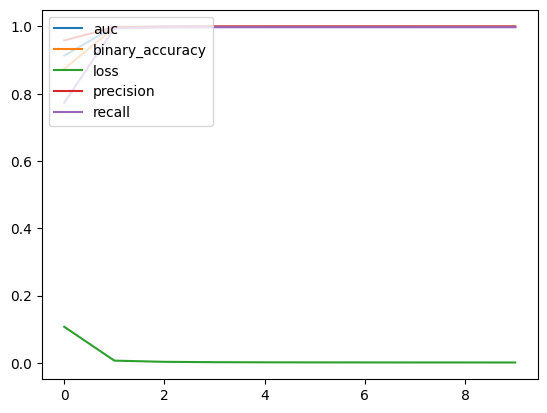

In [37]:
for k in history.history.keys():
  plt.plot(history.history[k])
plt.legend(history.history.keys(), loc='upper left')

# Laptop

In [38]:
laptop = pd.read_csv("Laptop_price.csv")
laptop.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19647.258047
std,0.731796,10.988665,313.438517,1.705882,0.866541,9408.488800
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10145.638575
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17298.948019
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31569.040889
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [39]:
priceMin = laptop["Price"].min()
priceMax = laptop["Price"].max()
def unnorm_price(price):
  return price * (priceMax - priceMin) + priceMin
fractional = ['Processor_Speed', 'Screen_Size', 'Weight', 'Price']
for col in [c for c in laptop.columns if c not in ["Brand"]]:
    laptop[col] = ((laptop[col] - laptop[col].min()) / (laptop[col].max() - laptop[col].min()))
laptop = pd.get_dummies(laptop, columns=["Brand"], drop_first=False)
laptop.head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,0.932352,0.428571,0.344086,0.028967,0.214214,0.353939,False,True,False,False,False
1,0.563441,0.000000,1.000000,0.050097,0.421198,0.923946,True,False,False,False,False
2,0.695649,0.000000,0.000000,0.140771,0.009532,0.923946,False,False,False,False,True
3,0.922682,0.428571,0.344086,0.212308,0.860589,0.355609,True,False,False,False,False
4,0.706292,1.000000,1.000000,0.666055,0.733374,0.923946,True,False,False,False,False


In [40]:

laptopFeatures = laptop.drop("Price", axis=1)
laptopTarget = laptop["Price"]


X_train, X_test, y_train, y_test = train_test_split(laptopFeatures, laptopTarget, test_size=0.2, random_state=0)

In [41]:

regressor_input = keras.Input(shape=(X_train.shape[1],))
x = keras.layers.Dense(
    units=10,
    activation='relu',
    use_bias=True,
    bias_initializer="zeros",
)(regressor_input)
regressor_output = keras.layers.Dense(
    units=1,
    activation='relu',
    use_bias=True,
    bias_initializer="zeros",
)(x)
regressor = keras.Model(inputs=regressor_input, outputs=regressor_output)

In [42]:
regressor.summary()
    

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
regressor.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.metrics.MSE,
    metrics=[
        keras.metrics.MAE,
        keras.metrics.MSE,
    ],
)

In [44]:
regressor.evaluate(
    x=X_test.astype('float32').values,
    y=y_test.astype('float32').values,
    batch_size=None,
    verbose=1,
)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2754 - mean_absolute_error: 0.4143 - mean_squared_error: 0.2754  


[0.26534995436668396, 0.40110859274864197, 0.26534995436668396]

In [45]:
history = regressor.fit(
    x=X_train.astype('float32').values,
    y=y_train.astype('float32').values,
    batch_size=None,
    epochs=20,
    shuffle=True,
    steps_per_epoch=None,
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1105 - mean_absolute_error: 0.2494 - mean_squared_error: 0.1105   
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0137 - mean_absolute_error: 0.0932 - mean_squared_error: 0.0137
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0062 - mean_absolute_error: 0.0573 - mean_squared_error: 0.0062
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0028 - mean_absolute_error: 0.0398 - mean_squared_error: 0.0028
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0023 - mean_absolute_error: 0.0335 - mean_squared_error: 0.0023
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0018 - mean_absolute_error: 0.0306 - mean_squared_error: 0.0018
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.0014 - mean_absolute_error: 0.0272 - mean_squared_error: 0.0014
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0021 - mean_absolute_error: 0.0268 - mean_squared_error

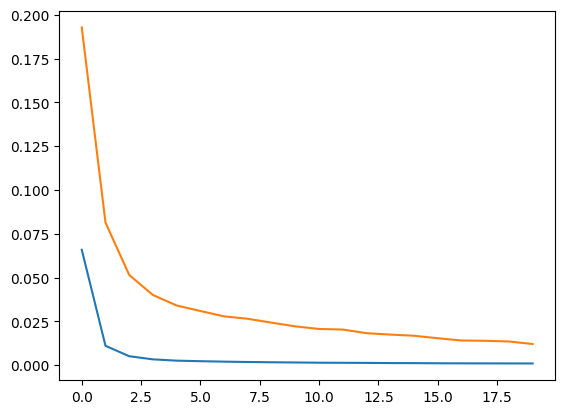

In [46]:


plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])